In [1]:
%matplotlib notebook
%env SPOTIPY_CLIENT_ID= 63943ce4afe14c4492a291a72ec75d19
%env SPOTIPY_CLIENT_SECRET= 6c519273fd4c4b68be537f7a169bb5b2

env: SPOTIPY_CLIENT_ID=63943ce4afe14c4492a291a72ec75d19
env: SPOTIPY_CLIENT_SECRET=6c519273fd4c4b68be537f7a169bb5b2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import Counter

client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
# Read csv path
songs_path = "../project-1/songs.csv"

In [4]:
# Read csv into notebook
songs_df = pd.read_csv(songs_path)
songs_df.head()

,Unnamed: 0,uri,count,name,release_date,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,377,Toxic,11/13/2003,79,False,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.02500,0.2420,0.924,143.040,198800
1,1,spotify:track:0VgkVdmE4gld66l8iyGjgx,162,Mask Off,6/30/2017,80,True,0.833,0.434,2,-8.795,1,0.4310,0.01020,0.02190,0.1650,0.281,150.062,204600
2,3,spotify:track:2xLMifQCjDGFmkHkpNLD9h,290,SICKO MODE,8/3/2018,89,True,0.834,0.730,8,-3.714,1,0.2220,0.00513,0.00000,0.1240,0.446,155.008,312820
3,4,spotify:track:66s45uMhk7Y4z0xUgESdm3,62,Unwell - 2007 Remaster,9/29/2007,62,False,0.442,0.793,9,-5.152,1,0.0347,0.04560,0.00000,0.3280,0.437,80.985,237267
4,5,spotify:track:5veJDT0MLsLbhYsx42GXUD,361,Don't Stand So Close To Me,10/3/1980,69,False,0.799,0.506,2,-9.414,1,0.0606,0.04530,0.00107,0.0365,0.518,140.309,242667


In [5]:
songs_df.drop("Unnamed: 0", axis=1)

,uri,count,name,release_date,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,377,Toxic,11/13/2003,79,False,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,198800
1,spotify:track:0VgkVdmE4gld66l8iyGjgx,162,Mask Off,6/30/2017,80,True,0.833,0.434,2,-8.795,1,0.4310,0.01020,0.021900,0.1650,0.281,150.062,204600
2,spotify:track:2xLMifQCjDGFmkHkpNLD9h,290,SICKO MODE,8/3/2018,89,True,0.834,0.730,8,-3.714,1,0.2220,0.00513,0.000000,0.1240,0.446,155.008,312820
3,spotify:track:66s45uMhk7Y4z0xUgESdm3,62,Unwell - 2007 Remaster,9/29/2007,62,False,0.442,0.793,9,-5.152,1,0.0347,0.04560,0.000000,0.3280,0.437,80.985,237267
4,spotify:track:5veJDT0MLsLbhYsx42GXUD,361,Don't Stand So Close To Me,10/3/1980,69,False,0.799,0.506,2,-9.414,1,0.0606,0.04530,0.001070,0.0365,0.518,140.309,242667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575,spotify:track:3rXCZRMiMZp0feGcYXpwYX,10,Cowboy Take Me Away,8/27/1999,68,False,0.467,0.622,6,-7.255,1,0.0310,0.36500,0.005270,0.0982,0.455,164.418,287267
11576,spotify:track:6qwLieyhZ2vhn3xuIOrw32,10,Let It Go,7/10/2020,69,True,0.651,0.477,2,-6.775,1,0.0443,0.07960,0.000000,0.1000,0.217,112.668,191587
11577,spotify:track:52lGuLAkIVbm4LZkSf9nj0,11,Kinfolks,4/3/2020,69,False,0.569,0.807,0,-4.584,1,0.0464,0.08760,0.000000,0.1640,0.883,76.011,181933
11578,spotify:track:2KkNkv6ciB6bt2hvHtOrin,12,Wake Up Love,6/12/2020,67,True,0.583,0.766,11,-4.743,0,0.4050,0.50200,0.000002,0.1590,0.203,131.374,215329


In [6]:
mostpopular_df = songs_df.loc[songs_df["popularity"] > 90, [
    "name", "count", "release_date", "popularity", "danceability", "energy", "instrumentalness", "speechiness"]]
mostpopular_df

,name,count,release_date,popularity,danceability,energy,instrumentalness,speechiness
80,La Jeepeta - Remix,115,4/24/2020,93,0.815,0.715,0.000005,0.2070
84,Caramelo,87,6/11/2020,91,0.728,0.806,0.000301,0.0623
106,TKN (feat. Travis Scott),233,5/28/2020,92,0.776,0.509,0.000001,0.4670
109,Supalonely,566,11/15/2019,93,0.863,0.631,0.000030,0.0534
110,ily (i love you baby) (feat. Emilee),360,11/26/2019,94,0.674,0.774,0.001880,0.0892
111,ROCKSTAR (feat. Roddy Ricch),598,4/17/2020,100,0.746,0.690,0.000000,0.1640
112,death bed (coffee for your head),554,2/8/2020,95,0.726,0.431,0.000000,0.1350
239,Tusa,256,11/7/2019,91,0.803,0.715,0.000134,0.2980
425,Watermelon Sugar,445,12/13/2019,95,0.548,0.816,0.000000,0.0465
434,Roses - Imanbek Remix,444,10/9/2019,95,0.770,0.724,0.010700,0.0495


In [7]:
sorted_ps_df = mostpopular_df.sort_values("popularity", ascending=False)
sorted_ps_df

,name,count,release_date,popularity,danceability,energy,instrumentalness,speechiness
111,ROCKSTAR (feat. Roddy Ricch),598,4/17/2020,100,0.746,0.690,0.000000,0.1640
1145,Blinding Lights,485,3/20/2020,99,0.514,0.730,0.000095,0.0598
1268,Savage Love (Laxed - Siren Beat),209,6/11/2020,96,0.767,0.481,0.000000,0.0803
112,death bed (coffee for your head),554,2/8/2020,95,0.726,0.431,0.000000,0.1350
2530,Breaking Me,258,12/19/2019,95,0.789,0.720,0.000000,0.2180
425,Watermelon Sugar,445,12/13/2019,95,0.548,0.816,0.000000,0.0465
434,Roses - Imanbek Remix,444,10/9/2019,95,0.770,0.724,0.010700,0.0495
110,ily (i love you baby) (feat. Emilee),360,11/26/2019,94,0.674,0.774,0.001880,0.0892
80,La Jeepeta - Remix,115,4/24/2020,93,0.815,0.715,0.000005,0.2070
5130,Wishing Well,138,7/10/2020,93,0.650,0.613,0.000000,0.1280


In [8]:
newindex_ps_df = sorted_ps_df.reset_index(drop=True)
newindex_ps_df

,name,count,release_date,popularity,danceability,energy,instrumentalness,speechiness
0,ROCKSTAR (feat. Roddy Ricch),598,4/17/2020,100,0.746,0.690,0.000000,0.1640
1,Blinding Lights,485,3/20/2020,99,0.514,0.730,0.000095,0.0598
2,Savage Love (Laxed - Siren Beat),209,6/11/2020,96,0.767,0.481,0.000000,0.0803
3,death bed (coffee for your head),554,2/8/2020,95,0.726,0.431,0.000000,0.1350
4,Breaking Me,258,12/19/2019,95,0.789,0.720,0.000000,0.2180
5,Watermelon Sugar,445,12/13/2019,95,0.548,0.816,0.000000,0.0465
6,Roses - Imanbek Remix,444,10/9/2019,95,0.770,0.724,0.010700,0.0495
7,ily (i love you baby) (feat. Emilee),360,11/26/2019,94,0.674,0.774,0.001880,0.0892
8,La Jeepeta - Remix,115,4/24/2020,93,0.815,0.715,0.000005,0.2070
9,Wishing Well,138,7/10/2020,93,0.650,0.613,0.000000,0.1280


In [9]:
# Least popular songs
leastpopular_df = songs_df.loc[songs_df["popularity"] < 20, [
    "name", "count", "release_date", "popularity", "danceability", "energy", "instrumentalness", "speechiness"]]
leastpopular_df.head(30)

,name,count,release_date,popularity,danceability,energy,instrumentalness,speechiness
165,Stayin' Alive - Remastered Version,26,11/9/2004,1,0.675,0.899,0.000139,0.0418
261,I Want To Break Free - Single Remix,14,2/27/1984,1,0.795,0.435,0.000260,0.0324
296,Hipócrita,10,7/17/2018,2,0.790,0.858,0.000000,0.0471
372,Vaina Loca,20,6/28/2018,3,0.754,0.805,0.000000,0.0752
443,"Let Me Go (with Alesso, Florida Georgia Line &...",10,9/8/2017,12,0.659,0.717,0.000000,0.0581
476,Gasolina,11,7/13/2004,0,0.853,0.808,0.000005,0.0575
481,Caile (feat. Zion & De La Ghetto),10,12/25/2016,1,0.768,0.735,0.000000,0.0669
483,"Diles (feat. Arcangel, Nengo Flow, Dj Luian & ...",12,8/26/2016,3,0.805,0.582,0.000000,0.0627
485,Me Rehúso,18,9/16/2016,1,0.746,0.794,0.000000,0.0698
487,No Quiere Enamorarse (Remix) [feat. Daddy Yankee],10,3/24/2016,1,0.765,0.814,0.000000,0.0666


In [10]:
# Grab only first 30 songs and put into a new data frame
thirty_lp_songs_df = pd.DataFrame(leastpopular_df.head(30))
thirty_lp_songs_df

,name,count,release_date,popularity,danceability,energy,instrumentalness,speechiness
165,Stayin' Alive - Remastered Version,26,11/9/2004,1,0.675,0.899,0.000139,0.0418
261,I Want To Break Free - Single Remix,14,2/27/1984,1,0.795,0.435,0.000260,0.0324
296,Hipócrita,10,7/17/2018,2,0.790,0.858,0.000000,0.0471
372,Vaina Loca,20,6/28/2018,3,0.754,0.805,0.000000,0.0752
443,"Let Me Go (with Alesso, Florida Georgia Line &...",10,9/8/2017,12,0.659,0.717,0.000000,0.0581
476,Gasolina,11,7/13/2004,0,0.853,0.808,0.000005,0.0575
481,Caile (feat. Zion & De La Ghetto),10,12/25/2016,1,0.768,0.735,0.000000,0.0669
483,"Diles (feat. Arcangel, Nengo Flow, Dj Luian & ...",12,8/26/2016,3,0.805,0.582,0.000000,0.0627
485,Me Rehúso,18,9/16/2016,1,0.746,0.794,0.000000,0.0698
487,No Quiere Enamorarse (Remix) [feat. Daddy Yankee],10,3/24/2016,1,0.765,0.814,0.000000,0.0666


In [11]:
sorted_thirty_df = thirty_lp_songs_df.sort_values("popularity", ascending=True)

In [12]:
# Reset index
newindex_lp_df = sorted_thirty_df.reset_index(drop=True)
newindex_lp_df

,name,count,release_date,popularity,danceability,energy,instrumentalness,speechiness
0,Vamo a Busal,10,12/13/2014,0,0.626,0.865,0.000000,0.1620
1,Ven Bailalo,17,12/29/2011,0,0.675,0.921,0.006180,0.0365
2,Explícale,10,8/11/2017,0,0.808,0.690,0.000000,0.1480
3,Gasolina,11,7/13/2004,0,0.853,0.808,0.000005,0.0575
4,Mr. Brightside,12,6/15/2004,0,0.351,0.928,0.000000,0.0759
5,Fanática Sensual,10,12/9/2014,0,0.791,0.847,0.000000,0.0492
6,Without Me,11,5/26/2002,1,0.915,0.656,0.000000,0.0716
7,La Modelo,11,12/22/2017,1,0.822,0.743,0.010300,0.0451
8,La Rompe Corazones,11,1/13/2017,1,0.685,0.859,0.000000,0.0553
9,Stayin' Alive - Remastered Version,26,11/9/2004,1,0.675,0.899,0.000139,0.0418


<IPython.core.display.Javascript object>


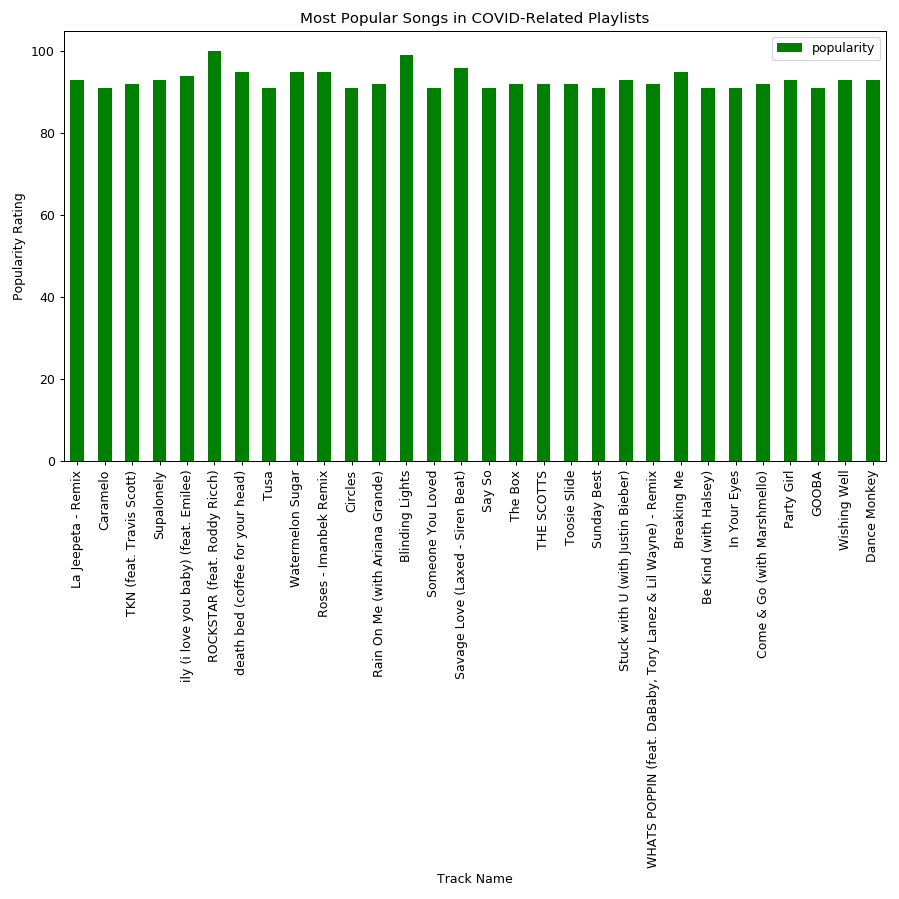

In [24]:
# Create graph of most popular and least popular songs

# Most Popular (Tracks vs Popularity)
# Filter the DataFrame to only include columns to chart
mp_name_and_popularity = mostpopular_df[["name","popularity"]]

# Set index to "name"
mp_name_and_popularity = mp_name_and_popularity.set_index("name")

# Create bar chart
mp_name_and_popularity.plot(kind="bar", figsize=(10, 10), color="g")
plt.title("Most Popular Songs in COVID-Related Playlists")
plt.xlabel("Track Name")
plt.ylabel("Popularity Rating")
plt.tight_layout()
plt.show()

# Save an image of the graph
plt.savefig("Images/MostPopularSongs.png")
plt.show()

<IPython.core.display.Javascript object>


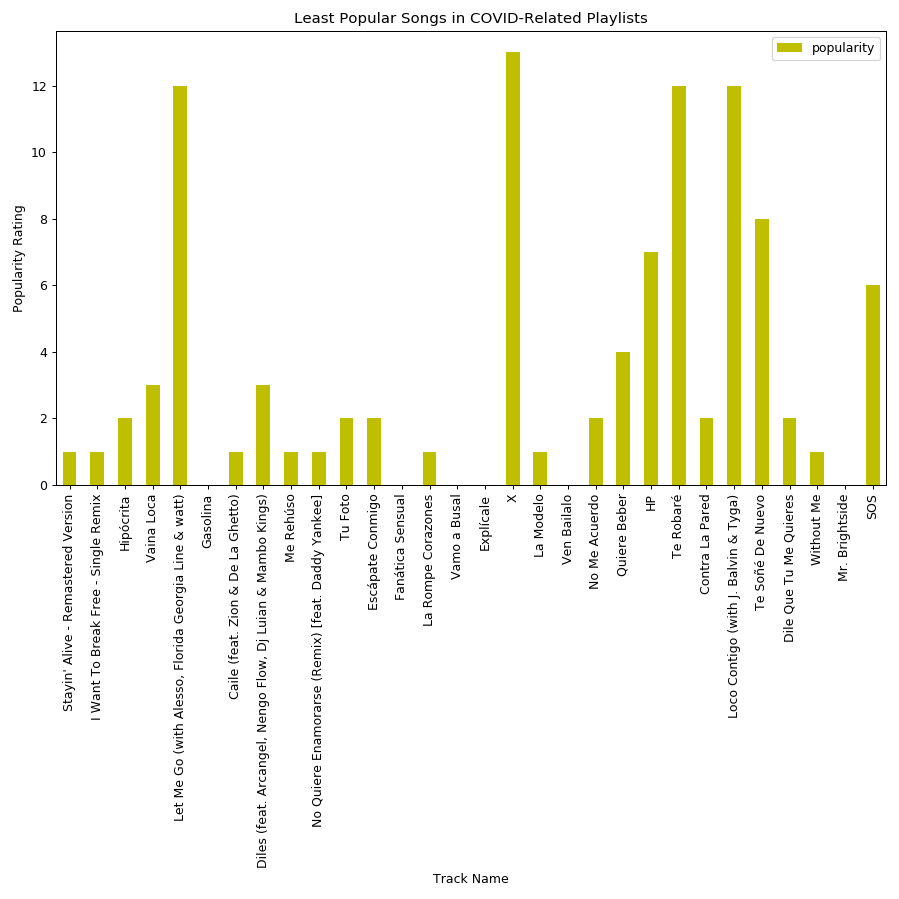

In [25]:
# Least Popular (Tracks vs Popularity)
# Filter the DataFrame to only include columns to chart
lp_name_and_popularity = leastpopular_df.head(30)[["name","popularity"]]

# Set index to "name"
lp_name_and_popularity = lp_name_and_popularity.set_index("name")

# Create bar chart
lp_name_and_popularity.plot(kind="bar", figsize=(10,10), color="y")
plt.title("Least Popular Songs in COVID-Related Playlists")
plt.xlabel("Track Name")
plt.ylabel("Popularity Rating")
plt.show()
plt.tight_layout()

# Save an image of the graph
plt.savefig("Images/LeastPopularSongs.png")
plt.show()

In [26]:
# Most popular tracks that appear in over 300 playlists
reoccuring_mp =mostpopular_df.loc[mostpopular_df["count"] > 300, [
    "name", "count", "release_date", "popularity", "danceability", "energy", "instrumentalness", "speechiness"]]
reoccuring_mp

,name,count,release_date,popularity,danceability,energy,instrumentalness,speechiness
109,Supalonely,566,11/15/2019,93,0.863,0.631,0.000030,0.0534
110,ily (i love you baby) (feat. Emilee),360,11/26/2019,94,0.674,0.774,0.001880,0.0892
111,ROCKSTAR (feat. Roddy Ricch),598,4/17/2020,100,0.746,0.690,0.000000,0.1640
112,death bed (coffee for your head),554,2/8/2020,95,0.726,0.431,0.000000,0.1350
425,Watermelon Sugar,445,12/13/2019,95,0.548,0.816,0.000000,0.0465
434,Roses - Imanbek Remix,444,10/9/2019,95,0.770,0.724,0.010700,0.0495
1130,Rain On Me (with Ariana Grande),361,5/22/2020,92,0.672,0.855,0.000000,0.0397
1145,Blinding Lights,485,3/20/2020,99,0.514,0.730,0.000095,0.0598
1385,Say So,503,11/7/2019,91,0.787,0.673,0.000004,0.1580
1661,The Box,459,12/6/2019,92,0.896,0.586,0.000000,0.0559


<IPython.core.display.Javascript object>


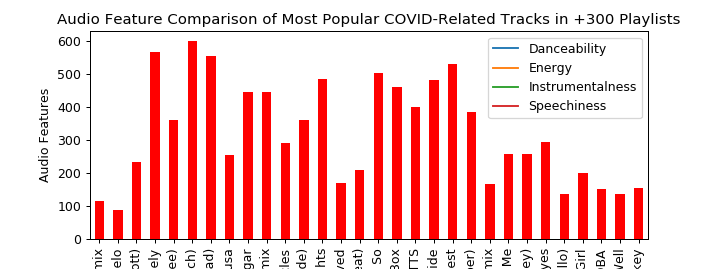

C:\Users\bbahaneb\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]


In [27]:
# Filter the DataFrame to only include columns to chart
mp_name_and_count = mostpopular_df[["name","count"]]

# Set index to "name"
mp_name_and_count = mp_name_and_count.set_index("name")

# Create bar chart
mp_name_and_count.plot(kind="bar", figsize=(8,3), color="r")
plt.title("Most Popular Songs in COVID-Related Playlists by Playlist Appearances")
plt.xlabel("Track Name")
plt.ylabel("Number of Playlist Appearances")
plt.show()
plt.tight_layout()

# Save an image of the graph
plt.savefig("Images/MostPopularSongsAppearance.png")
plt.show()

In [28]:
# Compare average playlist audio features of track in over 300 playlists
mp_avg_dance = reoccuring_mp["danceability"].mean()
mp_avg_dance

mp_avg_energy = reoccuring_mp["energy"].mean()
mp_avg_energy

mp_avg_instr = reoccuring_mp["instrumentalness"].mean()
mp_avg_instr

mp_avg_speech = reoccuring_mp["speechiness"].mean()

avg_audio_feat = pd.DataFrame({"Average Danceability": mp_avg_dance,
                  "Average Energy": mp_avg_energy,
                  "Average Instrumentalness": mp_avg_instr,
                  "Average Speechiness": mp_avg_speech},
                             index =[0])

avg_audio_feat

,Average Danceability,Average Energy,Average Instrumentalness,Average Speechiness
0,0.730071,0.634,0.000908,0.085929


In [29]:
Danceability, = plt.plot(reoccuring_mp["popularity"], reoccuring_mp["danceability"], label="Danceability")
Energy, = plt.plot(reoccuring_mp["popularity"], reoccuring_mp["energy"], label="Energy")
Instrumentalness, = plt.plot(reoccuring_mp["popularity"], reoccuring_mp["instrumentalness"], label="Instrumentalness")
Speechiness, = plt.plot(reoccuring_mp["popularity"], reoccuring_mp["speechiness"], label="Speechiness")

plt.title("Audio Feature Comparison of Most Popular COVID-Related Tracks in +300 Playlists")
plt.xlabel("Popularity")
plt.ylabel("Audio Features")
plt.legend(handles = [Danceability, Energy, Instrumentalness, Speechiness])
plt.show()

# Save an image of the graph
plt.savefig("Images/MostPopularSongsAF.png")
plt.show()